### Brightness Distributions
This code calculates and plots the distribution of satellite brightness over the night sky, as seen by a ground-based observer. Several models are included.

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
import lumos.conversions
import lumos.brdf.library
import lumos.calculator
import lumos.plot
import satellite_models.starlink_v1p5 as starlink_v1p5
import satellite_models.diffuse_sphere as diffuse_sphere_model

In [3]:
satellite_height = 550 * 1000

altitudes = np.linspace(0, 90, 45)
azimuths = np.linspace(0, 360, 90)
altitudes, azimuths = np.meshgrid(altitudes, azimuths)

sun_azimuth = 263

In [4]:
def plot_intensity(ax, sun_altitude, surfaces, earth_brdf = None, diffuse_sphere = False, filter = False):

    if diffuse_sphere:
        intensities = diffuse_sphere_model.get_intensity(
            0.65,
            satellite_height,
            altitudes,
            azimuths,
            sun_altitude,
            sun_azimuth)
    else:
        intensities = lumos.calculator.get_intensity_observer_frame(
            surfaces,
            satellite_height,
            altitudes,
            azimuths,
            sun_altitude,
            sun_azimuth,
            include_sun = True,
            include_earthshine = earth_brdf,
            earth_panel_density = 100,
            earth_brdf = earth_brdf
        )

    if filter:
        intensities = scipy.ndimage.gaussian_filter(intensities, 2, mode = ('wrap', 'reflect'))

    lumos.plot.contour_observer_frame(
        ax,
        altitudes,
        azimuths,
        lumos.conversions.intensity_to_ab_mag(intensities, clip = True),
        levels = (4, 8),
        cmap = "plasma_r"
    )

    ax.set_title("Sun Altitude" + r"$=$" + f"{sun_altitude}°")

In [5]:
def plot_compass(ax):
    ax.arrow(0, 0, 0, 0.75, width = 0.05, color = "black", head_length = 0.25, head_width = 0.25)
    ax.arrow(0, 0, -0.75, 0, width = 0.05, color = "black", head_length = 0.25, head_width = 0.25)
    ax.scatter([0], [0], s = 350, c = "black", zorder = 1)
    ax.annotate("N", (0, 1.15), horizontalalignment = 'center', 
                    verticalalignment = 'center', fontsize = 24, annotation_clip = False,
                    fontweight = 'bold')
    ax.annotate("E", (-1.15, 0), horizontalalignment = 'center', 
                    verticalalignment = 'center', fontsize = 24, annotation_clip = False,
                    fontweight = 'bold')
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)

In [6]:
def plot_composite_figure(title, surfaces, earth_brdf = None, diffuse_sphere = False, filter = False):

    fig = plt.figure(figsize = (32, 6), dpi = 300)

    cax = fig.add_axes([0, 0.05, 0.15, 0.75])

    h = 0.8
    w = h * 6 / 32

    ax1 = fig.add_axes([0.5 - w/2 - 2 * (w + 0.0075), 0.025, w, h], projection = 'polar')
    ax2 = fig.add_axes([0.5 - w/2 - 1 * (w + 0.0075), 0.025, w, h], projection = 'polar')
    ax3 = fig.add_axes([0.5 - w/2 + 0 * (w + 0.0075), 0.025, w, h], projection = 'polar')
    ax4 = fig.add_axes([0.5 - w/2 + 1 * (w + 0.0075), 0.025, w, h], projection = 'polar')
    ax5 = fig.add_axes([0.5 - w/2 + 2 * (w + 0.0075), 0.025, w, h], projection = 'polar')
    ax6 = fig.add_axes([0.9, 0, 0.25 * w, 0.25 * h])

    plot_compass(ax6)

    axs = (ax1, ax2, ax3, ax4, ax5)
    sun_altitudes = (40, 30, 20, 10, 5)

    for ax, sun_alt in zip(axs, sun_altitudes):
        plot_intensity(ax, sun_alt, surfaces, earth_brdf, diffuse_sphere, filter)
        ax.set_title(f"Sun Alt. = {sun_alt}°", y = -0.15, fontsize = 32)
        ax.set_xticklabels(['', '', '', ''])

    fig.suptitle(title, fontsize = 40)

    lumos.plot.colorbar(cax, levels = (-5, 8))
    cax.tick_params(labelsize = 28)
    cax.set_ylabel("AB Magnitude", fontsize = 32)
    cax.invert_yaxis()
    cax.yaxis.set_label_position("left")

    plt.show()

In [9]:
# plot_composite_figure(
#     title = "Our Model: Lab BRDFs, No Earthshine",
#     surfaces = starlink_v1p5.SURFACES_LAB_BRDFS
# )

In [10]:
# plot_composite_figure(
#     "Diffuse Sphere Model",
#     surfaces = None,
#     diffuse_sphere = True)

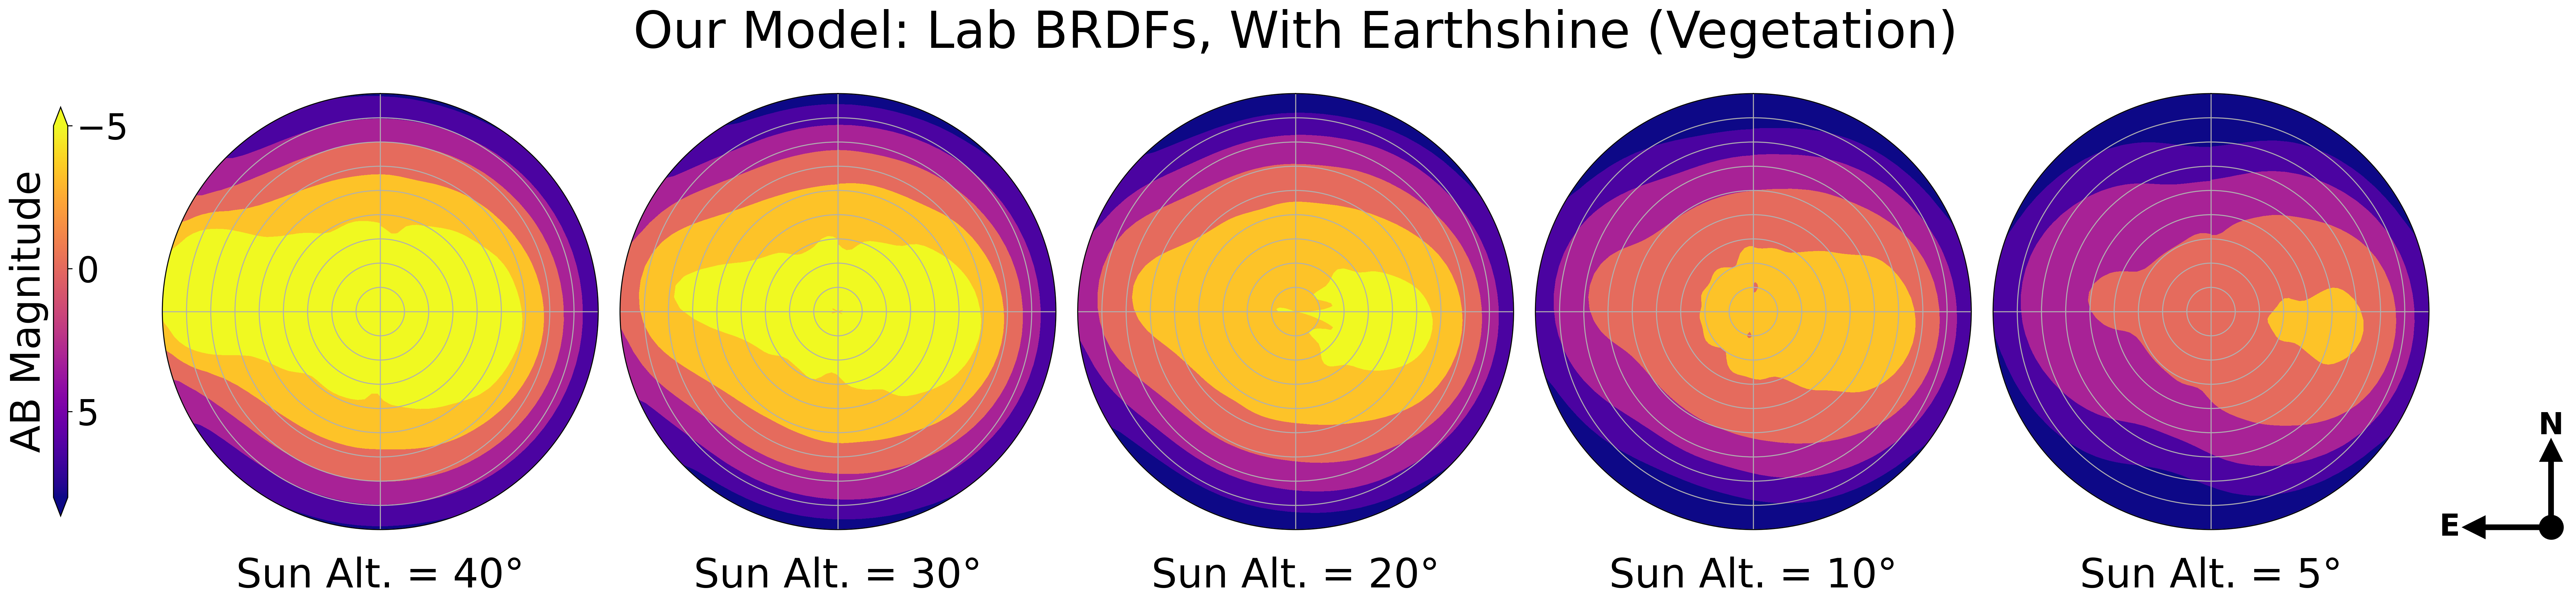

In [11]:
plot_composite_figure(
    "Our Model: Lab BRDFs, With Earthshine (Vegetation)",
    surfaces = starlink_v1p5.SURFACES_LAB_BRDFS,
    earth_brdf = lumos.brdf.library.PHONG(0.53, 0.28, 7.31),
    filter = False
    )

In [8]:
satellite_height = 550 * 1000

altitudes = np.linspace(0, 90, 45)
azimuths = np.linspace(0, 360, 90)
altitudes, azimuths = np.meshgrid(altitudes, azimuths)

sun_azimuth = 263

sun_altitudes = (40, 30, 20, 10, 5)

intses2 = []
for sun_alt in sun_altitudes:
        intensities = lumos.calculator.get_intensity_observer_frame(
            starlink_v1p5.SURFACES_LAB_BRDFS,
            satellite_height,
            altitudes,
            azimuths,
            sun_alt,
            sun_azimuth,
            include_sun = True,
            include_earthshine = False)
            # earth_panel_density = 100,
            # earth_brdf = lumos.brdf.library.PHONG(0.53, 0.28, 7.31))
        intses2.append(intensities)

In [40]:
satellite_height = 550 * 1000

altitudes = np.linspace(0, 90, 45)
azimuths = np.linspace(0, 360, 90)
altitudes, azimuths = np.meshgrid(altitudes, azimuths)

sun_azimuth = 263

sun_altitudes = (40, 30, 20, 10, 5)

intses = []
for sun_alt in sun_altitudes:
        intensities = lumos.calculator.get_intensity_observer_frame(
            starlink_v1p5.SURFACES_LAB_BRDFS,
            satellite_height,
            altitudes,
            azimuths,
            sun_alt,
            sun_azimuth,
            include_sun = True,
            #include_earthshine = False)
            earth_panel_density = 300,
            earth_brdf = lumos.brdf.library.PHONG(0.53, 0.28, 7.31))
        intses.append(intensities)

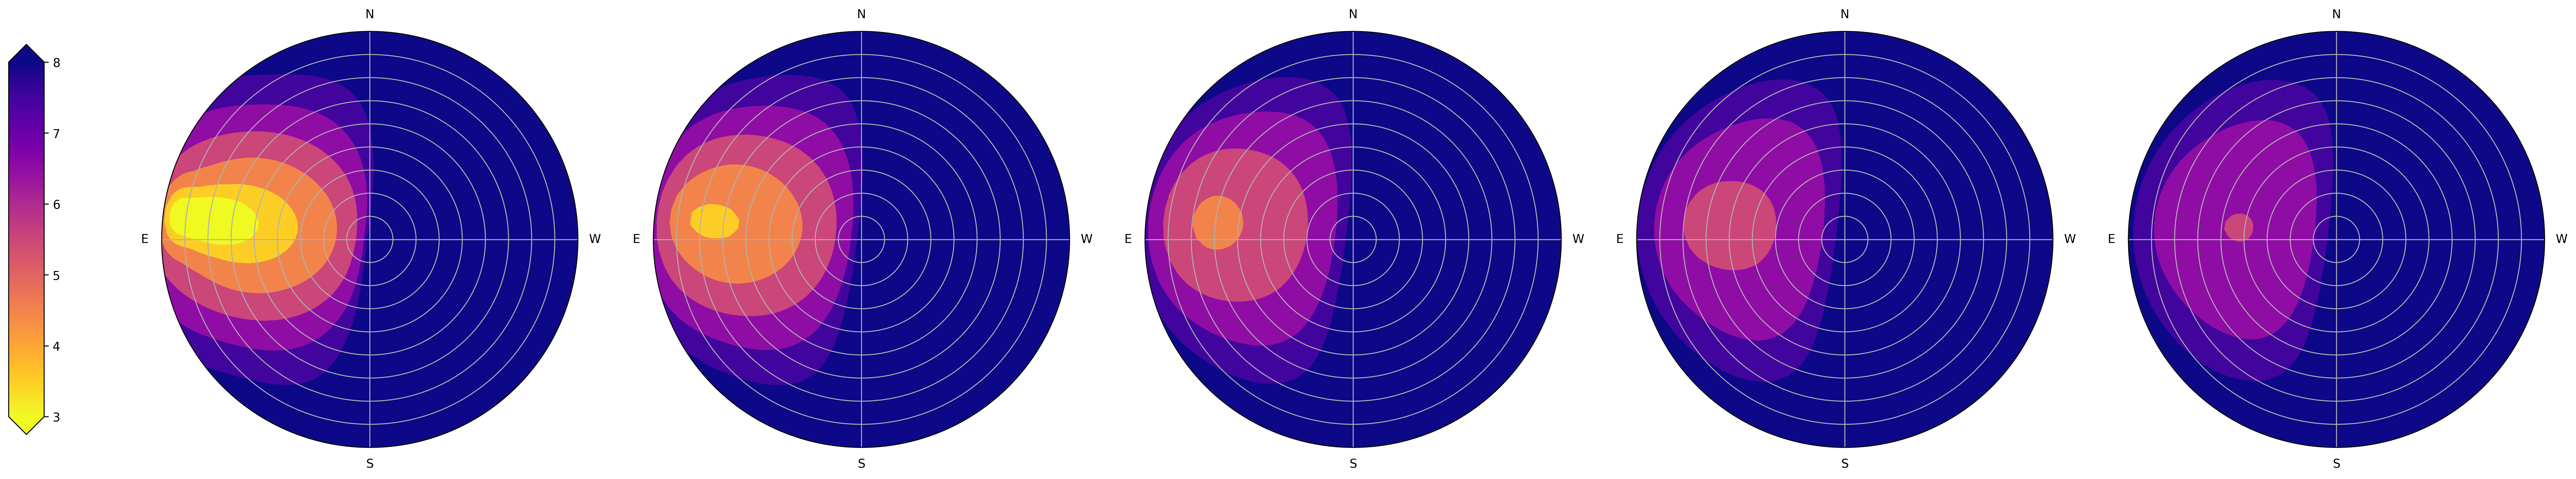

In [45]:
fig = plt.figure(figsize = (36, 6), dpi = 300)
h = 0.8
w = h * 6 / 32

ax1 = fig.add_axes([0.5 - w/2 - 2 * (w + 0.0075), 0.025, w, h], projection = 'polar')
ax2 = fig.add_axes([0.5 - w/2 - 1 * (w + 0.0075), 0.025, w, h], projection = 'polar')
ax3 = fig.add_axes([0.5 - w/2 + 0 * (w + 0.0075), 0.025, w, h], projection = 'polar')
ax4 = fig.add_axes([0.5 - w/2 + 1 * (w + 0.0075), 0.025, w, h], projection = 'polar')
ax5 = fig.add_axes([0.5 - w/2 + 2 * (w + 0.0075), 0.025, w, h], projection = 'polar')


lumos.plot.contour_observer_frame(
    ax1,
    altitudes,
    azimuths,
    lumos.conversions.intensity_to_ab_mag(intses2[0], clip = True),
    levels = (3, 8),
    cmap = "plasma_r")

lumos.plot.contour_observer_frame(
    ax2,
    altitudes,
    azimuths,
    lumos.conversions.intensity_to_ab_mag(intses2[1], clip = True),
    levels = (3, 8),
    cmap = "plasma_r")

lumos.plot.contour_observer_frame(
    ax3,
    altitudes,
    azimuths,
    lumos.conversions.intensity_to_ab_mag(intses2[2], clip = True),
    levels = (3, 8),
    cmap = "plasma_r")

lumos.plot.contour_observer_frame(
    ax4,
    altitudes,
    azimuths,
    lumos.conversions.intensity_to_ab_mag(intses2[3], clip = True),
    levels = (3, 8),
    cmap = "plasma_r")

lumos.plot.contour_observer_frame(
    ax5,
    altitudes,
    azimuths,
    lumos.conversions.intensity_to_ab_mag(intses2[4], clip = True),
    levels = (3, 8),
    cmap = "plasma_r")

cax = fig.add_axes([0, 0.05, 0.15, 0.75])
lumos.plot.colorbar(cax, levels = (3,8))

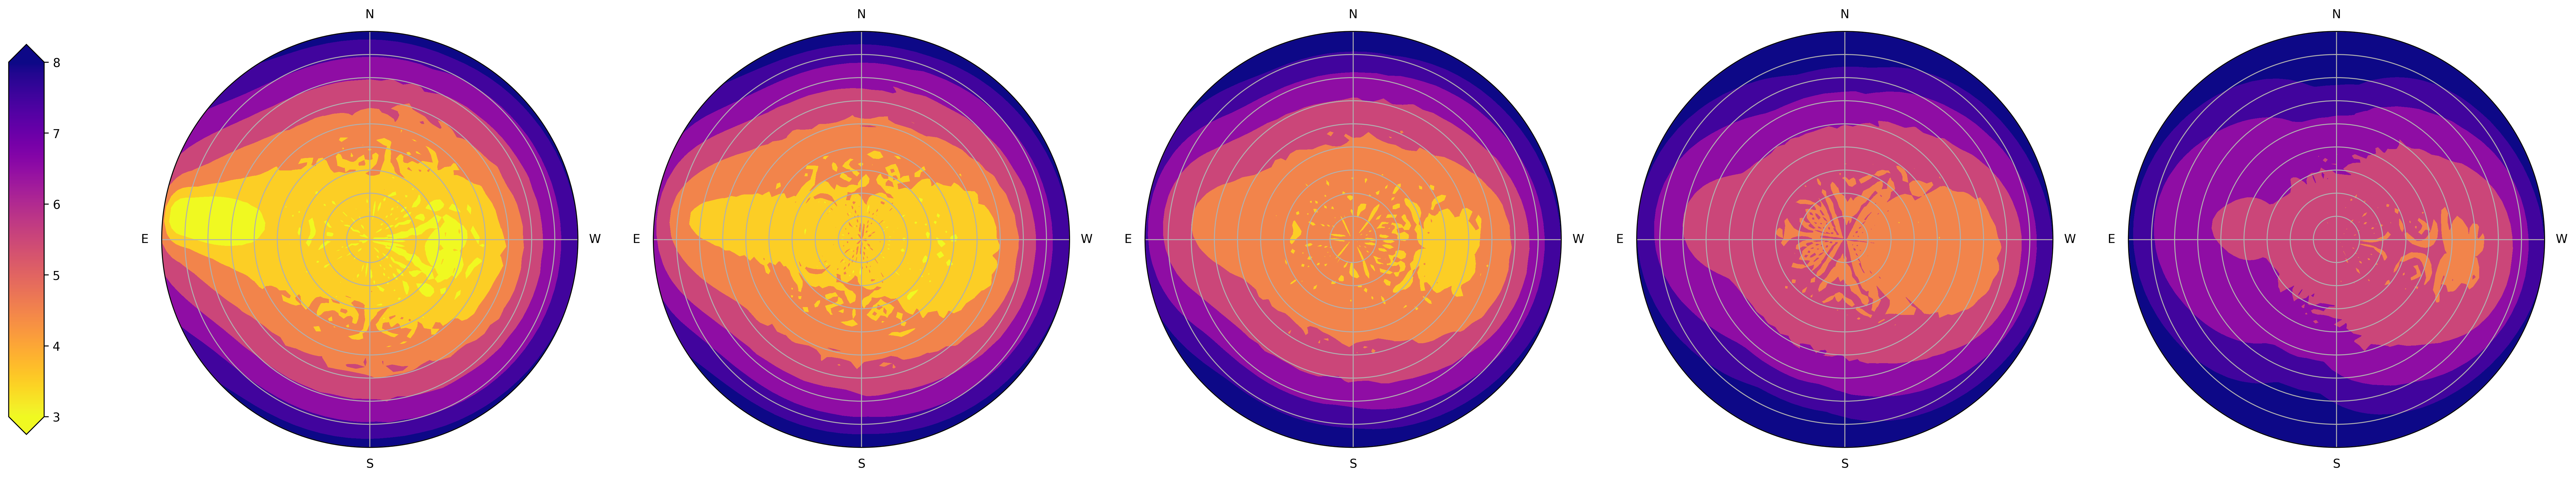

In [46]:
fig = plt.figure(figsize = (36, 6), dpi = 300)
h = 0.8
w = h * 6 / 32

ax1 = fig.add_axes([0.5 - w/2 - 2 * (w + 0.0075), 0.025, w, h], projection = 'polar')
ax2 = fig.add_axes([0.5 - w/2 - 1 * (w + 0.0075), 0.025, w, h], projection = 'polar')
ax3 = fig.add_axes([0.5 - w/2 + 0 * (w + 0.0075), 0.025, w, h], projection = 'polar')
ax4 = fig.add_axes([0.5 - w/2 + 1 * (w + 0.0075), 0.025, w, h], projection = 'polar')
ax5 = fig.add_axes([0.5 - w/2 + 2 * (w + 0.0075), 0.025, w, h], projection = 'polar')


lumos.plot.contour_observer_frame(
    ax1,
    altitudes,
    azimuths,
    lumos.conversions.intensity_to_ab_mag(intses[0], clip = False),
    levels = (3, 8),
    cmap = "plasma_r")

lumos.plot.contour_observer_frame(
    ax2,
    altitudes,
    azimuths,
    lumos.conversions.intensity_to_ab_mag(intses[1], clip = False),
    levels = (3, 8),
    cmap = "plasma_r")

lumos.plot.contour_observer_frame(
    ax3,
    altitudes,
    azimuths,
    lumos.conversions.intensity_to_ab_mag(intses[2], clip = False),
    levels = (3, 8),
    cmap = "plasma_r")

lumos.plot.contour_observer_frame(
    ax4,
    altitudes,
    azimuths,
    lumos.conversions.intensity_to_ab_mag(intses[3], clip = False),
    levels = (3, 8),
    cmap = "plasma_r")

lumos.plot.contour_observer_frame(
    ax5,
    altitudes,
    azimuths,
    lumos.conversions.intensity_to_ab_mag(intses[4], clip = False),
    levels = (3, 8),
    cmap = "plasma_r")

cax = fig.add_axes([0, 0.05, 0.15, 0.75])
lumos.plot.colorbar(cax, levels = (3,8))

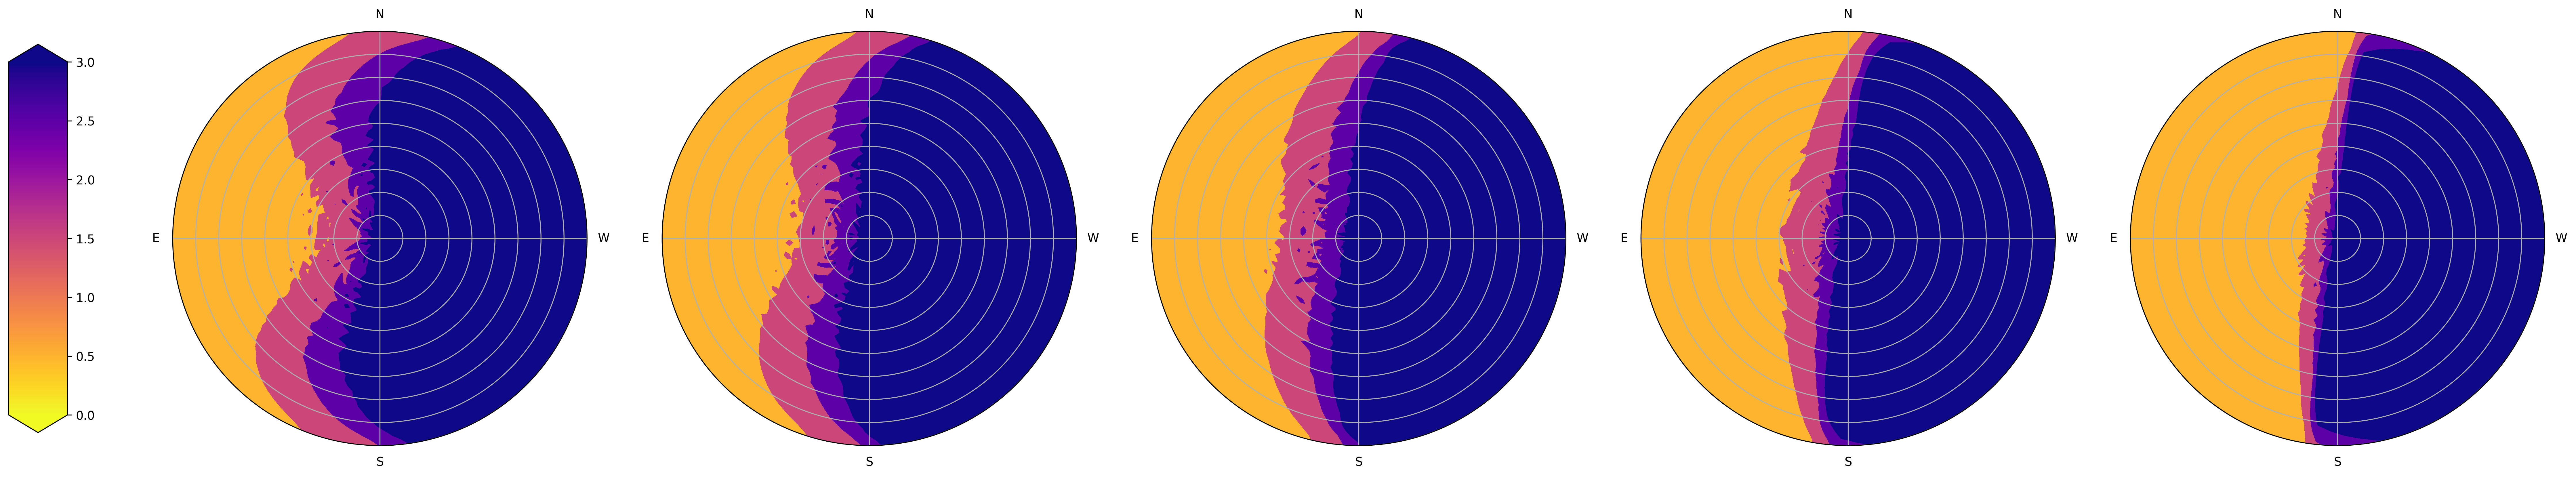

In [64]:
fig = plt.figure(figsize = (36, 6), dpi = 300)
h = 0.8
w = h * 6 / 32

ax1 = fig.add_axes([0.5 - w/2 - 2 * (w + 0.0075), 0.025, w, h], projection = 'polar')
ax2 = fig.add_axes([0.5 - w/2 - 1 * (w + 0.0075), 0.025, w, h], projection = 'polar')
ax3 = fig.add_axes([0.5 - w/2 + 0 * (w + 0.0075), 0.025, w, h], projection = 'polar')
ax4 = fig.add_axes([0.5 - w/2 + 1 * (w + 0.0075), 0.025, w, h], projection = 'polar')
ax5 = fig.add_axes([0.5 - w/2 + 2 * (w + 0.0075), 0.025, w, h], projection = 'polar')


lumos.plot.contour_observer_frame(
    ax1,
    altitudes,
    azimuths,
    lumos.conversions.intensity_to_ab_mag(intses2[0])-lumos.conversions.intensity_to_ab_mag(intses[0]),
    levels = (0, 3),
    cmap = "plasma_r")

lumos.plot.contour_observer_frame(
    ax2,
    altitudes,
    azimuths,
    lumos.conversions.intensity_to_ab_mag(intses2[1])-lumos.conversions.intensity_to_ab_mag(intses[1]),
    levels = (0, 3),
    cmap = "plasma_r")

lumos.plot.contour_observer_frame(
    ax3,
    altitudes,
    azimuths,
    lumos.conversions.intensity_to_ab_mag(intses2[2])-lumos.conversions.intensity_to_ab_mag(intses[2]),
    levels = (0, 3),
    cmap = "plasma_r")

lumos.plot.contour_observer_frame(
    ax4,
    altitudes,
    azimuths,
    lumos.conversions.intensity_to_ab_mag(intses2[3])-lumos.conversions.intensity_to_ab_mag(intses[3]),
    levels = (0, 3),
    cmap = "plasma_r")

lumos.plot.contour_observer_frame(
    ax5,
    altitudes,
    azimuths,
    lumos.conversions.intensity_to_ab_mag(intses2[4])-lumos.conversions.intensity_to_ab_mag(intses[4]),
    levels = (0, 3),
    cmap = "plasma_r")

cax = fig.add_axes([0, 0.05, 0.15, 0.75])
lumos.plot.colorbar(cax, levels = (0,3))

In [57]:
lumos.conversions.intensity_to_ab_mag(intses[4])-lumos.conversions.intensity_to_ab_mag(intses2[4])

array([[-0.15104592, -0.16976191, -0.19629279, ..., -4.33885132,
        -5.081752  , -6.60950293],
       [-0.07192776, -0.07992738, -0.0890301 , ..., -3.8495732 ,
        -4.58017395, -6.60950293],
       [-0.04332158, -0.04908876, -0.05529225, ..., -3.49977552,
        -4.22932081, -6.60950293],
       ...,
       [-1.876643  , -2.09034681, -2.37561962, ..., -6.65643829,
        -6.62054992, -6.60950293],
       [-0.63485083, -0.69879104, -0.79811866, ..., -5.30716482,
        -5.99993622, -6.60950293],
       [-0.15104592, -0.16976191, -0.19629279, ..., -4.33885132,
        -5.081752  , -6.60950293]])

In [172]:
import pandas as pd
stuff = pd.read_csv('/Users/physarah/Desktop/good_satellite_data_final_set.csv')

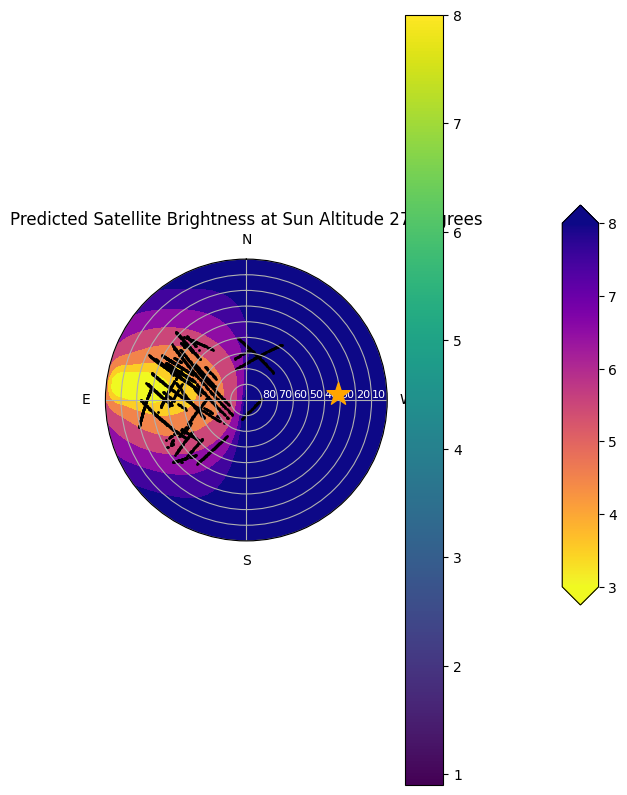

In [185]:



fig = plt.figure(figsize = (10, 10))
h = 0.8
w = h * 6 / 32
#ax1 = fig.add_axes([0.5 - w/2 - 2 * (w + 0.0075), 0.025, w, h], projection = 'polar')

ax1 = plt.subplot(1,2,1,  projection='polar')
plt.title("Predicted Satellite Brightness at Sun Altitude 27 degrees")
lumos.plot.contour_observer_frame(
    ax1,
    altitudes,
    azimuths,
    lumos.conversions.intensity_to_ab_mag(intses2[0], clip = True),
    levels = (3, 8),
    cmap = "plasma_r")

ax1.scatter(np.deg2rad(np.median(stuff['sun_az'])), (90 - np.median(stuff['sun_alt'])), 
           color='orange', s=300, label='Sun Location', zorder=10, marker='*')

sets = ax1.scatter(np.deg2rad(stuff['azimuth2']), 90 - stuff['altitude2'], 
           color='black', label = "Target Acquired", s = 1)

cbar = plt.colorbar(sets)
sets.set_clim(3, 8)


ax1.set_rlabel_position(270)
ax1.set_rticks([10, 20, 30, 40, 50, 60, 70, 80, 90])
ax1.set_yticklabels([80, 70, 60, 50, 40, 30, 20, 10, 0], c = 'white', fontsize = 8)
cax = fig.add_axes([0.4, 0.29, 0.4, 0.4])
lumos.plot.colorbar(cax, levels = (3,8))
plt.savefig("/Users/physarah/Desktop/test2.png")

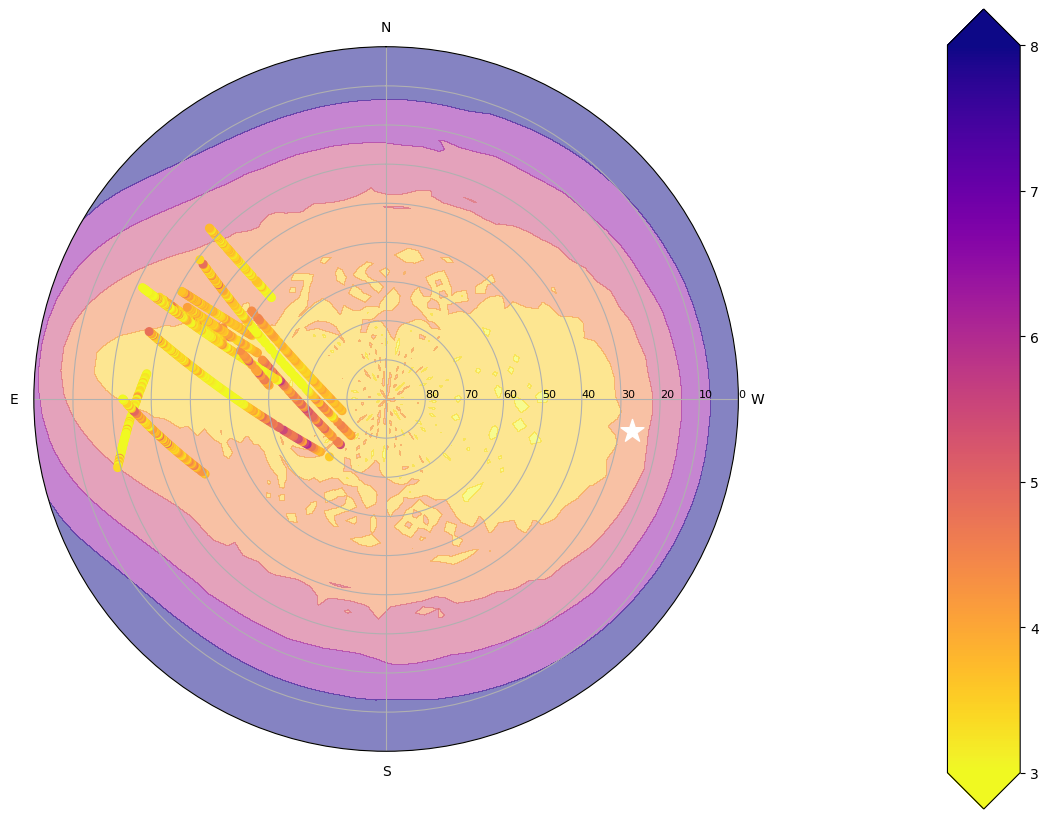

In [208]:
def contour_observer_frame2(
    ax,
    altitudes,
    azimuths,
    values,
    levels = None,
    cmap = 'plasma'
    ):

    """
    Creates contour plot in observer frame

    :param ax: Matplotlib axis for plotting on
    :type ax: :class:`matplotlib.pyplot.axes`
    :param altitudes: Altitudes in HCS frame (degrees)
    :type altitudes: :class:`np.ndarray`
    :param azimuths: Azimuths in HCS frame (degrees)
    :type azimuths: :class:`np.ndarray`
    :param values: Values to plot
    :type values: :class:`np.ndarray`
    :param levels: Minimum and maximum value to plot
    :type levels: tuple, optional
    :param cmap: Matplotlib colormap to use
    :type cmap: str
    """

    if levels is None:
        levels = (values.min(), values.max())

    ax.contourf(
        np.deg2rad(azimuths),
        90 - altitudes,
        values,
        cmap = matplotlib.colormaps[cmap],
        norm = matplotlib.colors.Normalize(levels[0], levels[1]),
        levels = range(levels[0], levels[1]),
       # levels = 2,
        extend = 'both',
        alpha = 0.5
        )

    ax.set_rmax(90)
    ax.set_yticklabels([])
    ax.set_theta_zero_location('N')
    ax.set_rticks([10, 20, 30, 40, 50, 60, 70, 80, 90])
    ax.set_xticks(np.deg2rad([0, 90, 180, 270]))
    ax.set_xticklabels(['N', 'E', 'S', 'W'])
    ax.set_rlabel_position(-22.5)
    ax.grid(True)



fig = plt.figure(figsize = (20, 20))
h = 0.8
w = h * 6 / 32
#ax1 = fig.add_axes([0.5 - w/2 - 2 * (w + 0.0075), 0.025, w, h], projection = 'polar')

ax1 = plt.subplot(1,2,1,  projection='polar')
#plt.title("Predicted Satellite Brightness at Sun Altitude 27 degrees")
contour_observer_frame2(
    ax1,
    altitudes,
    azimuths,
    lumos.conversions.intensity_to_ab_mag(intses[1], clip = True),
    levels = (3, 8),
    cmap = "plasma_r")

stuff2 = stuff[stuff['sun_alt']<30]
ax1.scatter(np.deg2rad(np.median(stuff2['sun_az'])), (90 - np.median(stuff2['sun_alt'])), 
           color='white', s=300, label='Sun Location', zorder=10, marker='*')

sets = ax1.scatter(np.deg2rad(stuff2['azimuth2']), 90 - stuff2['altitude2'], 
           c=stuff2['calibed_mags'], label = "Target Acquired", s = 30, cmap = "plasma_r")

cbar = plt.colorbar(sets)
sets.set_clim(3, 8)
cbar.remove()

ax1.set_rlabel_position(270)
ax1.set_rticks([10, 20, 30, 40, 50, 60, 70, 80, 90])
ax1.set_yticklabels([80, 70, 60, 50, 40, 30, 20, 10, 0], c = 'black', fontsize = 8)
cax = fig.add_axes([0.4, 0.29, 0.4, 0.4])
lumos.plot.colorbar(cax, levels = (3,8))
plt.savefig("/Users/physarah/Desktop/model_Earthshine_low.png")

/var/folders/8p/5731jz1n2rb34n99zjc89td80000gn/T/ipykernel_6484/1239176588.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels([10, 20, 30, 40, 50, 60, 70, 80, 90])


TypeError: Axis.set_ticks() takes from 2 to 3 positional arguments but 10 were given

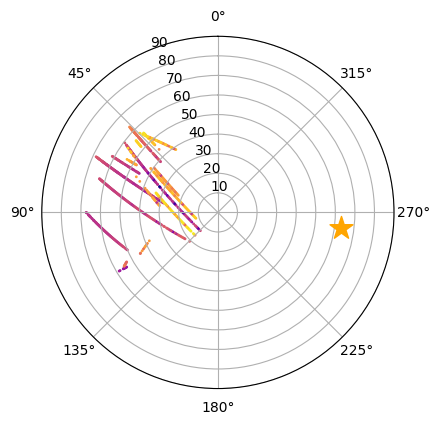

In [147]:
import matplotlib
fig = plt.figure(figsize = (10, 10))
h = 0.8
w = h * 6 / 32
#ax1 = fig.add_axes([0.5 - w/2 - 2 * (w + 0.0075), 0.025, w, h], projection = 'polar')

ax1 = plt.subplot(1,2,1,  projection='polar')

# lumos.plot.contour_observer_frame(
#     ax1,
#     altitudes,
#     azimuths,
#     lumos.conversions.intensity_to_ab_mag(intses2[0], clip = True),
#     levels = (3, 8),
#     cmap = "plasma_r")

ax1.scatter(np.deg2rad(np.median(stuff['sun_az'])), (90 - np.median(stuff['sun_alt'])), 
           color='orange', s=300, label='Sun Location', zorder=10, marker='*')

ax1.scatter(np.deg2rad(stuff['azimuth2']), 90 - stuff['altitude2'], 
           c = stuff['updated_pred_mag'], label = "Target Acquired", s = 1, cmap = 'plasma')

ax1.set_rmax(90)
ax1.set_yticklabels([10, 20, 30, 40, 50, 60, 70, 80, 90])
ax1.set_theta_zero_location('N')
ax1.set_rticks(10, 20, 30, 40, 50, 60, 70, 80, 90)
ax1.set_xticks(np.deg2rad([0, 90, 180, 270]))
ax1.set_xticklabels(['N', 'E', 'S', 'W'])
ax1.set_rlabel_position(40)
ax1.grid(True)

           #norm = matplotlib.colors.Normalize(3, 8))
ax1.set_rlabel_position(40)
ax1.set_rticks([10, 20, 30, 40, 50, 60, 70, 80, 90])
cax = fig.add_axes([0.4, 0.29, 0.4, 0.4])
lumos.plot.colorbar(cax, levels = (3,8))
plt.show()